# Deskripsi Tugas

### Tugas Mandiri 

Diberikan beberapa dataset yang merepresentasikan permasalahan pada kasus _supervised learning_. Bandingkanlah beberapa metode klasifikasi pada machine learning (minimal 3 metode) dan jelaskan proses klasifikasi serta analisisnya.

# Menyiapkan _Library_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import zipfile

# Menyiapkan Data

In [2]:
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('/')
data = pd.read_csv('/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# EDA

In [7]:
for col in data.columns:
    print('{}: {} data unik'.format(col, len(data[col].value_counts())))

Time: 124592 data unik
V1: 275663 data unik
V2: 275663 data unik
V3: 275663 data unik
V4: 275663 data unik
V5: 275663 data unik
V6: 275663 data unik
V7: 275663 data unik
V8: 275663 data unik
V9: 275663 data unik
V10: 275663 data unik
V11: 275663 data unik
V12: 275663 data unik
V13: 275663 data unik
V14: 275663 data unik
V15: 275663 data unik
V16: 275663 data unik
V17: 275663 data unik
V18: 275663 data unik
V19: 275663 data unik
V20: 275663 data unik
V21: 275663 data unik
V22: 275663 data unik
V23: 275663 data unik
V24: 275663 data unik
V25: 275663 data unik
V26: 275663 data unik
V27: 275663 data unik
V28: 275663 data unik
Amount: 32767 data unik
Class: 2 data unik


## Kelas

In [8]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

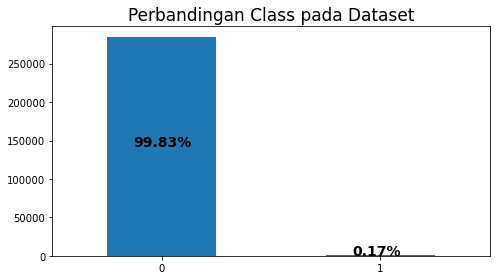

In [9]:
fig, ax = plt.subplots(figsize=(7,4))
# name = ['Berita Benar','Berita Hoax']
ax = data['Class'].value_counts().plot(kind='bar')
ax.set_title('Perbandingan Class pada Dataset', fontsize = 17)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# menghitung presentase
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0.12, 
            i.get_height()-i.get_height()/2, 
            str(round((i.get_height()/total)*100, 2))+'%', 
            fontsize=14, 
            color='black', 
            weight ='bold')
plt.tight_layout()

Dari visualisasi ini terlihat kelas dalam dataset sangat _imbalance_

## Atribut Numerik

### _Outlier Handling_

Text(0.5, 1.0, 'Plot Boxplot Atribut Numerik')

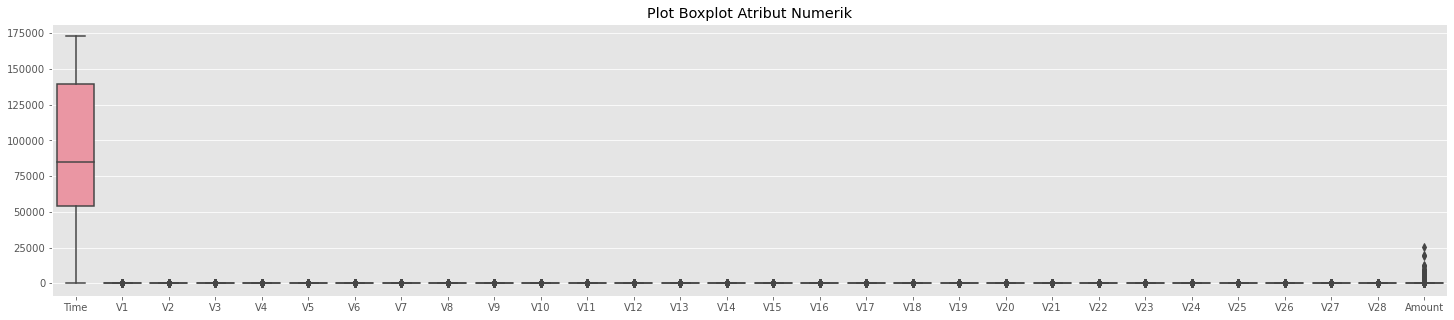

In [10]:
col_num = data.columns[:-1]

plt.figure(figsize=(25,5))
plt.style.use('ggplot')
g_bp = sns.boxplot(data=data[col_num])
g_bp.set_title('Plot Boxplot Atribut Numerik')

Terlihat terdapat _outlier_ pada atribut numerik, yang akan dicek lebih lanjut

In [11]:
Q1 = data[col_num].quantile(0.25)
Q3 = data[col_num].quantile(0.75)
IQR = Q3 - Q1
((data[col_num] < (Q1 - 1.5 * IQR)) | (data[col_num] > (Q3 + 1.5 * IQR))).sum().apply(lambda x: '{:.2f} %'.format(x/data.shape[0]*100)) #round(),2))

Time       0.00 %
V1         2.48 %
V2         4.75 %
V3         1.18 %
V4         3.91 %
V5         4.32 %
V6         8.06 %
V7         3.14 %
V8         8.47 %
V9         2.91 %
V10        3.33 %
V11        0.27 %
V12        5.39 %
V13        1.18 %
V14        4.97 %
V15        1.02 %
V16        2.87 %
V17        2.61 %
V18        2.64 %
V19        3.58 %
V20        9.75 %
V21        5.09 %
V22        0.46 %
V23        6.51 %
V24        1.68 %
V25        1.88 %
V26        1.96 %
V27       13.75 %
V28       10.65 %
Amount    11.20 %
dtype: object

_Outlier_ yang ada akan dihapus sebelum digunakan pada proses selanjutnya.

In [12]:
data_clean = data.copy()

for col in col_num:
    Q1 = data_clean[col].quantile(0.25)
    Q3 = data_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    data_clean = data_clean[((data_clean[col] >= (Q1 - 1.5 * IQR)) & (data_clean[col] <= (Q3 + 1.5 * IQR)))]
data_clean.shape, data.shape, 'Persentase data tanpa outlier: {:.2f}% dari data awal'.format(data_clean.shape[0]/data.shape[0]*100)

((110122, 31),
 (284807, 31),
 'Persentase data tanpa outlier: 38.67% dari data awal')

Text(0.5, 1.0, 'Korelasi Diantara Variabel Numerik')

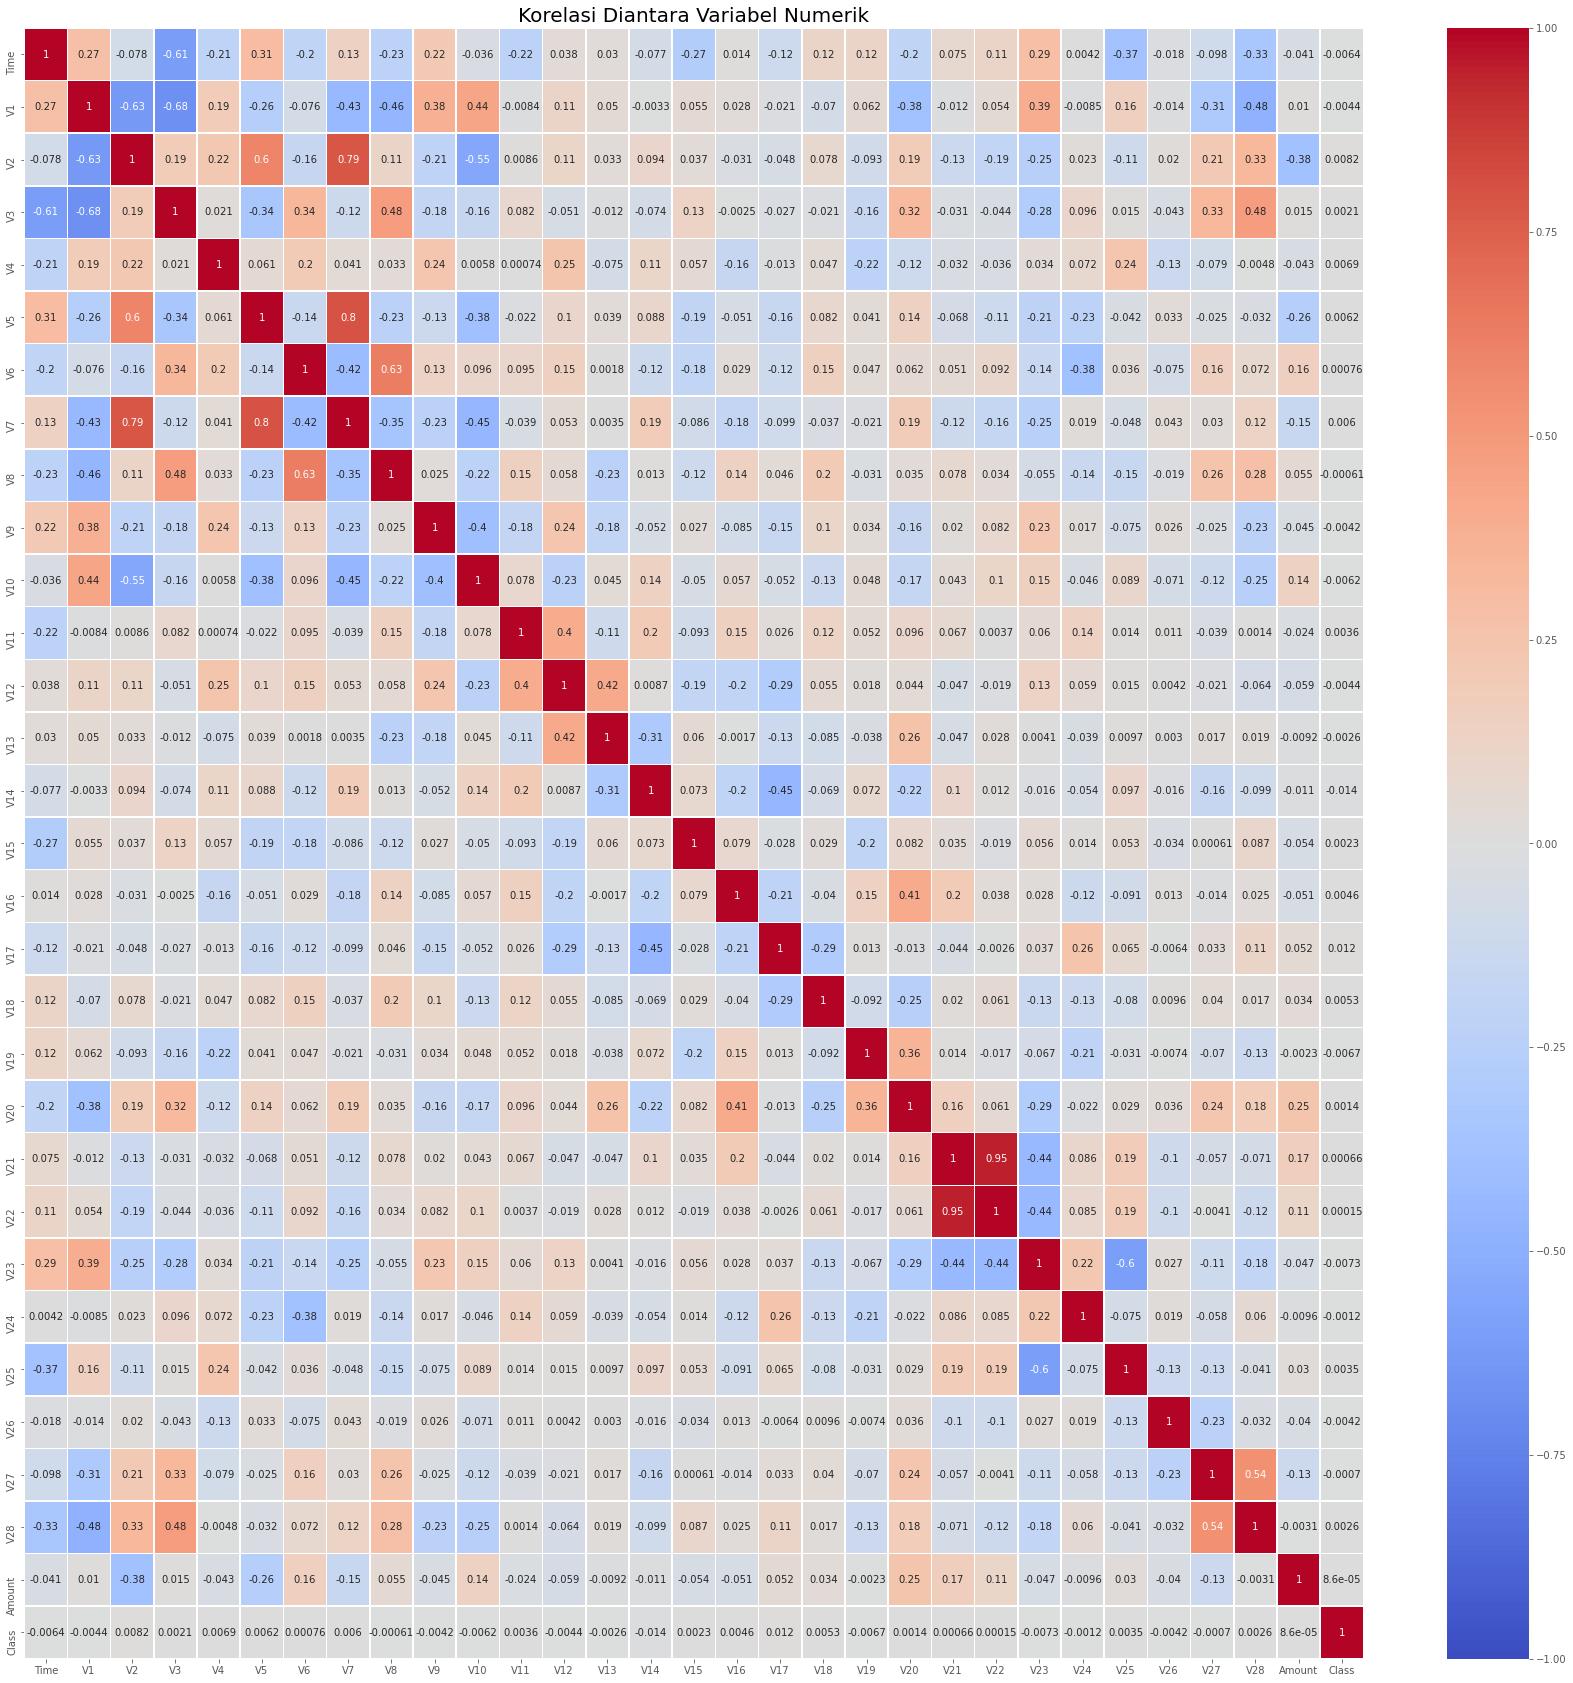

In [13]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (30,30)
sns.heatmap(data_clean.corr(), annot=True, linewidths=.5, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasi Diantara Variabel Numerik', fontsize = 20)

# Pembuatan Model

## _Preprocessing: Data Transformation_

In [14]:
# Normalization
data_clean[col_num] = (data_clean[col_num]-data_clean[col_num].min())/(data_clean[col_num].max()-data_clean[col_num].min())

In [15]:
data_clean.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,110122.000000,110122.000000,110122.000000,110122.000000,110122.000000,110122.000000,110122.000000,110122.000000,110122.000000,110122.000000,...,110122.000000,110122.000000,110122.000000,110122.000000,110122.000000,110122.000000,110122.000000,110122.000000,110122.000000,110122.000000
mean,0.552257,0.720912,0.500312,0.488955,0.527794,0.482288,0.460071,0.497057,0.499123,0.503596,...,0.491699,0.501035,0.523096,0.525723,0.516593,0.516488,0.508623,0.512417,0.204245,0.000118
std,0.270175,0.203167,0.124932,0.160751,0.158580,0.144477,0.145398,0.150281,0.158833,0.169521,...,0.153788,0.155375,0.177048,0.185441,0.158814,0.193464,0.181949,0.185402,0.237192,0.010865
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.319832,0.513745,0.418795,0.377963,0.411035,0.388566,0.358816,0.390063,0.388327,0.402454,...,0.366261,0.370423,0.406165,0.403566,0.388468,0.376945,0.394419,0.371150,0.020988,0.000000
50%,0.468634,0.780960,0.495188,0.509822,0.544370,0.482693,0.444711,0.506836,0.482894,0.499446,...,0.483447,0.497296,0.514563,0.534985,0.527798,0.522412,0.481656,0.527265,0.102325,0.000000
75%,0.812854,0.917807,0.588632,0.607391,0.624328,0.579979,0.551430,0.600559,0.592271,0.607694,...,0.607688,0.619550,0.636218,0.665604,0.638800,0.619209,0.586723,0.603502,0.310932,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Boxplot Atribut Numerik yang Siap Digunakan')

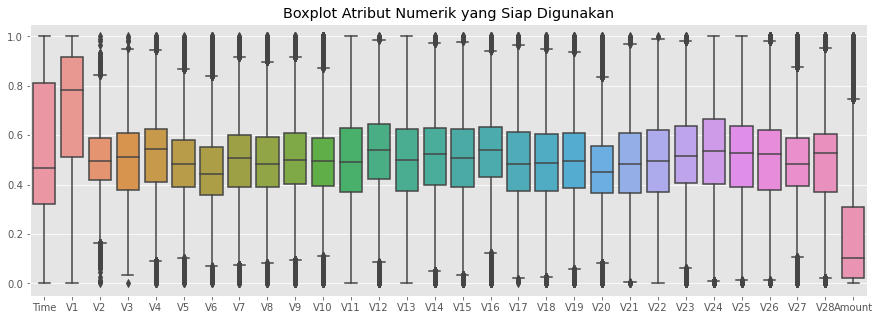

In [16]:
    plt.figure(figsize=(15,5))
    plt.style.use('ggplot')
    g_bp_clean = sns.boxplot(data=data_clean[col_num])
    g_bp_clean.set_title('Boxplot Atribut Numerik yang Siap Digunakan')

## _Splitting Data_

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_tes, y_train, y_tes = train_test_split(data_clean[data_clean.columns[:-1]], data_clean['Class'], test_size=0.3, random_state=42, stratify=data_clean['Class'])
x_train.shape, x_tes.shape, y_train.shape, y_tes.shape

((77085, 30), (33037, 30), (77085,), (33037,))

In [18]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
35620,0.221061,0.374990,0.580511,0.747484,0.601152,0.412326,0.904966,0.607178,0.754653,0.554692,...,0.234540,0.603001,0.656921,0.320258,0.409451,0.513278,0.395135,0.404359,0.678358,0.825595
87263,0.356541,0.353559,0.587382,0.652750,0.323557,0.494347,0.582662,0.555200,0.803651,0.389655,...,0.620204,0.592501,0.536464,0.357335,0.360136,0.550951,0.940459,0.202550,0.454935,0.494665
72681,0.317221,0.794198,0.530804,0.515775,0.622855,0.405905,0.292922,0.489639,0.424793,0.552394,...,0.378267,0.321718,0.292377,0.649631,0.632785,0.558492,0.570184,0.421223,0.585494,0.013992
88040,0.358590,0.355817,0.534473,0.769136,0.558785,0.634661,0.405580,0.569311,0.603150,0.494860,...,0.442080,0.464396,0.441199,0.495098,0.655051,0.541410,0.203488,0.654628,0.846798,0.042894
229175,0.843968,0.966876,0.336777,0.361614,0.362306,0.378999,0.447830,0.309236,0.403440,0.458902,...,0.564893,0.654951,0.678851,0.706753,0.786013,0.454857,0.424491,0.487676,0.364849,0.035333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103828,0.398252,0.506092,0.693622,0.621769,0.550490,0.687763,0.594297,0.722273,0.427354,0.333706,...,0.641225,0.514465,0.518763,0.214850,0.155434,0.536397,0.327151,0.757194,0.900441,0.176666
158685,0.646132,0.940958,0.477480,0.260897,0.503432,0.617961,0.494742,0.514786,0.412509,0.582649,...,0.392652,0.721623,0.761954,0.460921,0.635048,0.644695,0.312816,0.500196,0.320222,0.007067
127920,0.454443,0.445623,0.699952,0.677840,0.442279,0.577525,0.301953,0.712955,0.369359,0.375872,...,0.481800,0.417390,0.387818,0.471712,0.650038,0.373988,0.473734,0.352344,0.937252,0.006289
213399,0.805869,0.942062,0.324379,0.277431,0.412997,0.419397,0.396708,0.418027,0.361570,0.327953,...,0.104809,0.467283,0.558204,0.514636,0.349591,0.467732,0.901053,0.332503,0.292347,0.472758


## Modelling

In [19]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

In [20]:
def build_model(list_model, x_train, y_train, x_tes, y_tes):
    mod = []
    acc = []
    prec = []
    rec = []
    f1 = []
    cm = []
    
    for i, model in enumerate(list_model):
        print(model)
        if i<len(list_model)-1:            
            model_ = model(random_state=42).fit(x_train, y_train)
            mod.append(model_)
            y_pred = model_.predict(x_tes)
            acc.append(metrics.accuracy_score(y_tes, y_pred))
            prec.append(metrics.precision_score(y_tes, y_pred))
            rec.append(metrics.recall_score(y_tes, y_pred))
            f1.append(metrics.f1_score(y_tes, y_pred))
            cm.append(metrics.confusion_matrix(y_tes, y_pred))

        else:            
            est = []
            for j in range(i):
                est.append(('model_'+str(j), mod[j]))            
            model_ = model(estimators=est, voting='hard').fit(x_train, y_train)
            y_pred = model_.predict(x_tes)
            acc.append(metrics.accuracy_score(y_tes, y_pred))
            prec.append(metrics.precision_score(y_tes, y_pred))
            rec.append(metrics.recall_score(y_tes, y_pred))
            f1.append(metrics.f1_score(y_tes, y_pred))
            cm.append(metrics.confusion_matrix(y_tes, y_pred))

    return acc, prec, rec, f1, cm

In [21]:
list_model = [DecisionTreeClassifier, LogisticRegression, SGDClassifier, Perceptron, SVC, 
               RandomForestClassifier, AdaBoostClassifier, 
              GradientBoostingClassifier, VotingClassifier] #GaussianProcessClassifier,
list_nama_model = ['Decision\nTree', 'Logistic\nRegression', 'Stocasthic\nGradient\nDescent', 'Perceptron', 'Support\nVektor\nMachine',
                    'Random\nForest', 'Ada Boost', 'Gradient\nBoosting', 'Voting'] #'Gaussian\nProcess',
acc, prec, rec, f1, cm = build_model(list_model, x_train, y_train, x_tes, y_tes)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
<class 'sklearn.linear_model._logistic.LogisticRegression'>


D:\Installan Apps\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>


D:\Installan Apps\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<class 'sklearn.linear_model._perceptron.Perceptron'>
<class 'sklearn.svm._classes.SVC'>


D:\Installan Apps\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<class 'sklearn.ensemble._forest.RandomForestClassifier'>


D:\Installan Apps\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>


D:\Installan Apps\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
<class 'sklearn.ensemble._voting.VotingClassifier'>


D:\Installan Apps\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
hasil_metric = pd.DataFrame({'Model': list_nama_model,
                             'Akurasi': [x*100 for x in acc], #acc*100,
                             'Presisi': [x*100 for x in prec],
                             'Recall': [x*100 for x in rec],
                             'F1-Score': [x*100 for x in f1]})
hasil_metric

,Model,Akurasi,Presisi,Recall,F1-Score
0,Decision\nTree,99.975785,0.000000,0.0,0.000000
1,Logistic\nRegression,99.987892,0.000000,0.0,0.000000
2,Stocasthic\nGradient\nDescent,99.987892,0.000000,0.0,0.000000
3,Perceptron,99.948543,6.666667,25.0,10.526316
4,Support\nVektor\nMachine,99.987892,0.000000,0.0,0.000000
5,Random\nForest,99.987892,0.000000,0.0,0.000000
6,Ada Boost,99.987892,0.000000,0.0,0.000000
7,Gradient\nBoosting,99.984865,0.000000,0.0,0.000000
8,Voting,99.987892,0.000000,0.0,0.000000


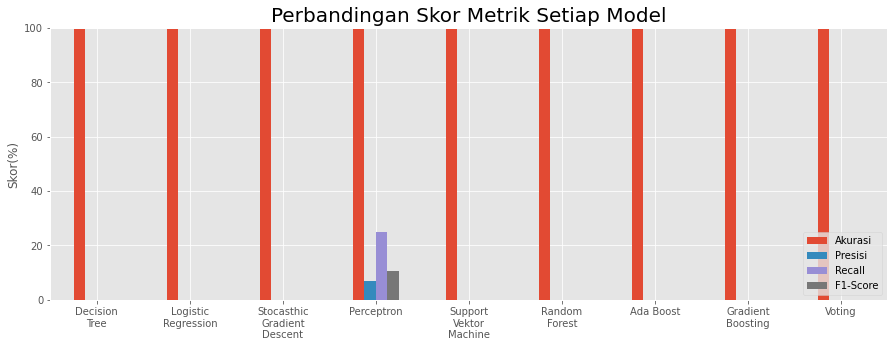

In [23]:
ax = hasil_metric.plot(kind='bar',ylabel='Skor(%)', ylim=(0,100), figsize=(15,5)) #, xticks=hasil_metric.Model)
ax.set_xticks(hasil_metric.index)
ax.set_xticklabels(hasil_metric.Model, rotation=0)
ax.set_title('Perbandingan Skor Metrik Setiap Model', size=20)
ax.legend(loc=4)

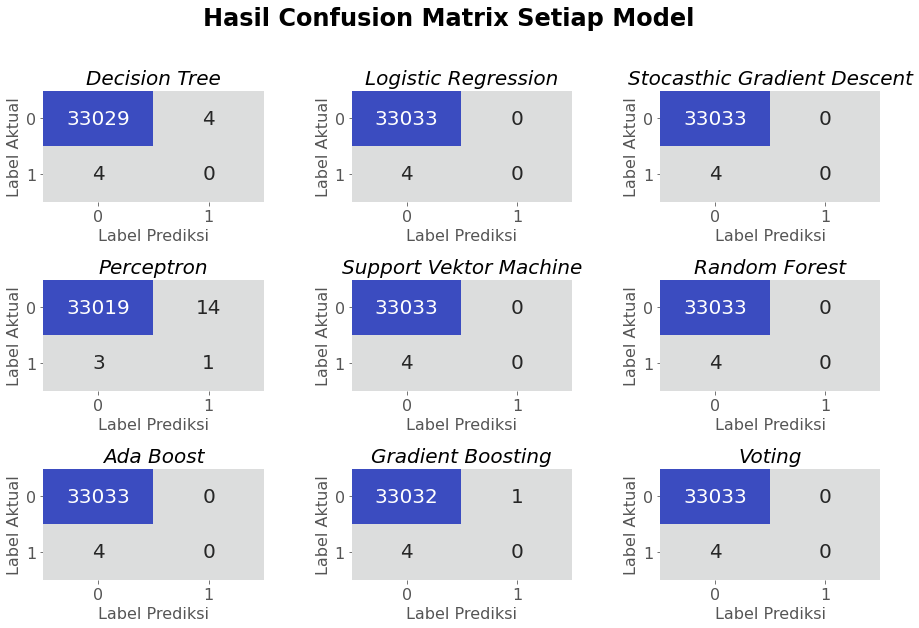

In [24]:
plt.style.use('ggplot')
plt.figure(figsize=(15,9))
plt.suptitle('Hasil Confusion Matrix Setiap Model', fontsize=24, y=1.01, fontweight='bold')
plt.subplots_adjust(wspace = 0.4, hspace=0.7)

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.title(list_nama_model[i].replace('\n',' '), size=20, fontstyle='italic')
    g_cm = sns.heatmap(cm[i], annot=True ,fmt='d',cbar=False, cmap='coolwarm_r',
                       center=0, annot_kws={'size': 20}, xticklabels=True, 
                       yticklabels=True)
    g_cm.set_xticklabels(g_cm.get_xticklabels(), fontsize=16) 
    g_cm.set_yticklabels(g_cm.get_yticklabels(), fontsize=16, rotation=0) 
    plt.xlabel('Label Prediksi', fontsize=16)
    plt.ylabel('Label Aktual', fontsize=16) 

> Secara umum hasil klasifikasi menunjukkan tidak ada model yang dapat melakukan klasifikasi ke dalam kelas '1' dengan baik. Hampir semua nilai presisi, _recall_, dan _f1-score_ **0**. Hal ini mungkin memang disebabkan karena keadaan kelas yang _imbalance_ sangat ekstrim. Dilihat dari plot korelasi dalam bentuk _heatmap_, juga menunjukkan tidak ada atribut yang memiliki nilai korelasi posistif yang tinggi.